In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

In [34]:
customer_df = pd.read_csv('./dataset/olist_customers_dataset.csv')
geo_df = pd.read_csv('./dataset/olist_geolocation_dataset.csv')
item_df = pd.read_csv('./dataset/olist_order_items_dataset.csv')
payment_df = pd.read_csv('./dataset/olist_order_payments_dataset.csv')
review_df = pd.read_csv('./dataset/olist_order_reviews_dataset.csv')
order_df = pd.read_csv('./dataset/olist_orders_dataset.csv')
seller_df = pd.read_csv('./dataset/olist_sellers_dataset.csv')
product_df = pd.read_csv('./dataset/olist_products_dataset.csv')
category_df = pd.read_csv('./dataset/product_category_name_translation.csv')


# 檢查資料集並合併

In [35]:
# geo_df
display(geo_df.head())
display(geo_df.info())

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

# 合併順序:item_df,seller_df,order_df,customer_df,product_df

In [36]:
display(item_df.head())
display(item_df.info())

display(seller_df.head())
display(seller_df.info())

display(order_df.head())
display(order_df.info())

display(customer_df.head())
display(customer_df.info())

display(product_df.head())
display(product_df.info())

item_seller_df = pd.merge(item_df,seller_df[['seller_id','seller_zip_code_prefix','seller_city','seller_state']],
                          on='seller_id', how='left')
display(item_seller_df.head())
display(item_seller_df.info())

item_seller_order_df = pd.merge(item_seller_df,order_df,on='order_id', how='left')
display(item_seller_order_df.head())
display(item_seller_order_df.info())

item_seller_order_customer_df = pd.merge(item_seller_order_df,customer_df[['customer_id','customer_zip_code_prefix','customer_city',
                                                                           'customer_state']],on='customer_id', how='left')
display(item_seller_order_customer_df.head())
display(item_seller_order_customer_df.info())

item_seller_order_customer_product_df = pd.merge(item_seller_order_customer_df,product_df,on='product_id', how='left')
display(item_seller_order_customer_product_df.head())
display(item_seller_order_customer_product_df.info())


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                112650 non-null  object 
 1   order_item_id           112650 non-null  int64  
 2   product_id              112650 non-null  object 
 3   seller_id               112650 non-null  object 
 4   shipping_limit_date     112650 non-null  object 
 5   price                   112650 non-null  float64
 6   freight_value           112650 non-null  float64
 7   seller_zip_code_prefix  112650 non-null  int64  
 8   seller_city             112650 non-null  object 
 9   seller_state            112650 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 9.5+ MB


None

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   seller_zip_code_prefix         112650 non-null  int64  
 8   seller_city                    112650 non-null  object 
 9   seller_state                   112650 non-null  object 
 10  customer_id                    112650 non-null  object 
 11  order_status                   112650 non-null  object 
 12  order_purchase_timestamp      

None

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,13226,varzea paulista,SP


<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   seller_zip_code_prefix         112650 non-null  int64  
 8   seller_city                    112650 non-null  object 
 9   seller_state                   112650 non-null  object 
 10  customer_id                    112650 non-null  object 
 11  order_status                   112650 non-null  object 
 12  order_purchase_timestamp      

None

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,28013,campos dos goytacazes,RJ,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,15775,santa fe do sul,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,35661,para de minas,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,12952,atibaia,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,13226,varzea paulista,SP,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   seller_zip_code_prefix         112650 non-null  int64  
 8   seller_city                    112650 non-null  object 
 9   seller_state                   112650 non-null  object 
 10  customer_id                    112650 non-null  object 
 11  order_status                   112650 non-null  object 
 12  order_purchase_timestamp      

None

In [37]:
# category_df
display(category_df.head())
display(category_df.info())

# 把巴西文和英文轉成字典
eng_category = pd.Series(category_df['product_category_name_english'].values,index=category_df.product_category_name).to_dict()
eng_category.update({np.nan:'none'})
eng_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

{'beleza_saude': 'health_beauty',
 'informatica_acessorios': 'computers_accessories',
 'automotivo': 'auto',
 'cama_mesa_banho': 'bed_bath_table',
 'moveis_decoracao': 'furniture_decor',
 'esporte_lazer': 'sports_leisure',
 'perfumaria': 'perfumery',
 'utilidades_domesticas': 'housewares',
 'telefonia': 'telephony',
 'relogios_presentes': 'watches_gifts',
 'alimentos_bebidas': 'food_drink',
 'bebes': 'baby',
 'papelaria': 'stationery',
 'tablets_impressao_imagem': 'tablets_printing_image',
 'brinquedos': 'toys',
 'telefonia_fixa': 'fixed_telephony',
 'ferramentas_jardim': 'garden_tools',
 'fashion_bolsas_e_acessorios': 'fashion_bags_accessories',
 'eletroportateis': 'small_appliances',
 'consoles_games': 'consoles_games',
 'audio': 'audio',
 'fashion_calcados': 'fashion_shoes',
 'cool_stuff': 'cool_stuff',
 'malas_acessorios': 'luggage_accessories',
 'climatizacao': 'air_conditioning',
 'construcao_ferramentas_construcao': 'construction_tools_construction',
 'moveis_cozinha_area_de_ser

In [38]:
# map完後有24筆空值，先drop
item_seller_order_customer_product_df['product_category_name'] = item_seller_order_customer_product_df['product_category_name'].map(eng_category)
display(item_seller_order_customer_product_df['product_category_name'].isnull().value_counts())
# item_seller_order_customer_product_df['product_category_name'].unique()

False    112626
True         24
Name: product_category_name, dtype: int64

# 最後合併payment和review

In [39]:
display(payment_df.head())
display(payment_df.info())

display(review_df.head())
display(review_df.info())


item_seller_order_customer_product_payment_df = pd.merge(item_seller_order_customer_product_df,payment_df,on='order_id', how='left')
item_seller_order_customer_product_payment_review_df = pd.merge(item_seller_order_customer_product_payment_df,review_df,
                                                                on='order_id', how='left')
final_df = item_seller_order_customer_product_payment_review_df
final_df.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,28013,campos dos goytacazes,RJ,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,15775,santa fe do sul,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,35661,para de minas,MG,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,12952,atibaia,SP,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,13226,varzea paulista,SP,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


# 資料清理

In [40]:
pd.set_option('display.max_columns', None) # 查看所有資料
final_df = final_df.drop(['order_id','product_id','seller_id','customer_id','review_id','review_comment_message','product_description_lenght',
                          'review_comment_title','order_approved_at','product_photos_qty',
                          'seller_zip_code_prefix','order_delivered_carrier_date',
                          'customer_zip_code_prefix','customer_city','seller_city','seller_state'],axis = 1)
display(final_df.head())
display(final_df.info())

,order_item_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_state,product_category_name,product_name_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp
0,1,2017-09-19 09:45:35,58.90,13.29,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,RJ,cool_stuff,58.0,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19,5,2017-09-21 00:00:00,2017-09-22 10:57:03
1,1,2017-05-03 11:05:13,239.90,19.93,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,SP,pet_shop,56.0,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83,4,2017-05-13 00:00:00,2017-05-15 11:34:13
2,1,2018-01-18 14:48:30,199.00,17.87,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,MG,furniture_decor,59.0,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87,5,2018-01-23 00:00:00,2018-01-23 16:06:31
3,1,2018-08-15 10:10:18,12.99,12.79,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,SP,perfumery,42.0,200.0,16.0,10.0,15.0,1.0,credit_card,2.0,25.78,4,2018-08-15 00:00:00,2018-08-15 16:39:01
4,1,2017-02-13 13:57:51,199.90,18.14,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,SP,garden_tools,59.0,3750.0,35.0,40.0,30.0,1.0,credit_card,3.0,218.04,5,2017-03-02 00:00:00,2017-03-03 10:54:59


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118318 entries, 0 to 118317
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_item_id                  118318 non-null  int64  
 1   shipping_limit_date            118318 non-null  object 
 2   price                          118318 non-null  float64
 3   freight_value                  118318 non-null  float64
 4   order_status                   118318 non-null  object 
 5   order_purchase_timestamp       118318 non-null  object 
 6   order_delivered_customer_date  115730 non-null  object 
 7   order_estimated_delivery_date  118318 non-null  object 
 8   customer_state                 118318 non-null  object 
 9   product_category_name          118293 non-null  object 
 10  product_name_lenght            116609 non-null  float64
 11  product_weight_g               118298 non-null  float64
 12  product_length_cm             

None

In [41]:
# 時間欄位處理
# order_delivered_customer_date - order_purchase_timestamp = 預估抵達日 - 購買日 = 貨物實際抵達天數
from datetime import datetime,timedelta

arrival = pd.to_datetime(final_df['order_delivered_customer_date'])
departure = pd.to_datetime(final_df['order_purchase_timestamp']) 
transfer_duration = arrival - departure
final_df['order_deliver_duration'] = transfer_duration.dt.days
display(final_df['order_deliver_duration'].head())

# order_estimated_delivery_date - order_delivered_customer_date = 物流績效
estimated = pd.to_datetime(final_df['order_estimated_delivery_date'])
actual = pd.to_datetime(final_df['order_delivered_customer_date'])
transfer_duration = estimated - actual
final_df['deliver_performence'] = transfer_duration.dt.days
display(final_df['order_deliver_duration'].head())

# review_answer_timestamp - review_creation_date = 評論回復績效
post = pd.to_datetime(final_df['review_creation_date'])
reply = pd.to_datetime(final_df['review_answer_timestamp'])
review_answer_duration = reply - post
final_df['review_answer_duration'] = review_answer_duration.dt.days
display(final_df['review_answer_duration'].head())

# shipping_limit_date - order_purchase_timestamp = 賣家出貨績效
issue = pd.to_datetime(final_df['order_purchase_timestamp'])
received_issue = pd.to_datetime(final_df['shipping_limit_date'])
seller_performence = received_issue - issue
final_df['seller_performence'] = seller_performence.dt.days
display(final_df['seller_performence'].head())

# 最後移除datetime欄位
final_df = final_df.drop(['review_creation_date','review_answer_timestamp','shipping_limit_date',
                          'order_purchase_timestamp','order_estimated_delivery_date','order_delivered_customer_date'],axis = 1)
display(final_df.head())


0     7.0
1    16.0
2     7.0
3     6.0
4    25.0
Name: order_deliver_duration, dtype: float64

0     7.0
1    16.0
2     7.0
3     6.0
4    25.0
Name: order_deliver_duration, dtype: float64

0    1
1    2
2    0
3    0
4    1
Name: review_answer_duration, dtype: int64

0    6
1    7
2    4
3    7
4    9
Name: seller_performence, dtype: int64

,order_item_id,price,freight_value,order_status,customer_state,product_category_name,product_name_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_deliver_duration,deliver_performence,review_answer_duration,seller_performence
0,1,58.90,13.29,delivered,RJ,cool_stuff,58.0,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19,5,7.0,8.0,1,6
1,1,239.90,19.93,delivered,SP,pet_shop,56.0,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83,4,16.0,2.0,2,7
2,1,199.00,17.87,delivered,MG,furniture_decor,59.0,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87,5,7.0,13.0,0,4
3,1,12.99,12.79,delivered,SP,perfumery,42.0,200.0,16.0,10.0,15.0,1.0,credit_card,2.0,25.78,4,6.0,5.0,0,7
4,1,199.90,18.14,delivered,SP,garden_tools,59.0,3750.0,35.0,40.0,30.0,1.0,credit_card,3.0,218.04,5,25.0,15.0,1,9


In [42]:
display(final_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118318 entries, 0 to 118317
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_item_id           118318 non-null  int64  
 1   price                   118318 non-null  float64
 2   freight_value           118318 non-null  float64
 3   order_status            118318 non-null  object 
 4   customer_state          118318 non-null  object 
 5   product_category_name   118293 non-null  object 
 6   product_name_lenght     116609 non-null  float64
 7   product_weight_g        118298 non-null  float64
 8   product_length_cm       118298 non-null  float64
 9   product_height_cm       118298 non-null  float64
 10  product_width_cm        118298 non-null  float64
 11  payment_sequential      118315 non-null  float64
 12  payment_type            118315 non-null  object 
 13  payment_installments    118315 non-null  float64
 14  payment_value       

None

# 填補缺失值

In [43]:
# product_category_name
display(final_df['product_category_name'].value_counts().head())          
final_df['product_category_name'] = final_df['product_category_name'].fillna('bed_bath_table') # 用bed_bath_table填補遺失值 

# product_name_lenght
print('平均產品名稱長度:',final_df['product_name_lenght'].mean())
final_df['product_name_lenght'] = final_df['product_name_lenght'].fillna(48) # 用mean填補遺失值 
                                          
# product_description_lenght
# print('平均產品描述長度:',final_df['product_description_lenght'].mean())
# final_df['product_description_lenght'] = final_df['product_description_lenght'].fillna(785)

# product_photos_qty
# print('平均產品照片數量:',final_df['product_photos_qty'].mean())
# final_df['product_photos_qty'] = final_df['product_photos_qty'].fillna(2)

# product_weight_g            
print('平均產品重量:',final_df['product_weight_g'].mean())
final_df['product_weight_g'] = final_df['product_weight_g'].fillna(2112)

# product_length_cm
print('平均產品長度:',final_df['product_length_cm'].mean())
final_df['product_length_cm'] = final_df['product_length_cm'].fillna(785)

# product_width_cm 
print('平均產品寬度:',final_df['product_width_cm'].mean())
final_df['product_width_cm'] = final_df['product_width_cm'].fillna(2112)


# product_height_cm 
print('平均產品高度:',final_df['product_height_cm'].mean())
final_df['product_height_cm'] = final_df['product_height_cm'].fillna(16)

# payment_sequential
print('平均付款方式數量:',final_df['payment_sequential'].mean())
final_df['payment_sequential'] = final_df['payment_sequential'].fillna(1)

# payment_type
display(final_df['payment_type'].value_counts())
final_df['payment_type'] = final_df['payment_type'].fillna('credit_card')

# payment_installments 
print('平均分期付款期數:',final_df['payment_installments'].mean())
final_df['payment_installments'] = final_df['payment_installments'].fillna(3)

# payment_value 
print('平均付款金額:',final_df['payment_value'].mean())
final_df['payment_value'] = final_df['payment_value'].fillna(172)

# 物流績效 
print('物流績效:',final_df['deliver_performence'].mean())
final_df['deliver_performence'] = final_df['deliver_performence'].fillna(172)

# 商品實際花費日期 
print('商品實際花費日期:',final_df['order_deliver_duration'].mean())
final_df['order_deliver_duration'] = final_df['order_deliver_duration'].fillna(172)

bed_bath_table           11990
health_beauty            10033
sports_leisure            9005
furniture_decor           8833
computers_accessories     8151
Name: product_category_name, dtype: int64

平均產品名稱長度: 48.76740217307412
平均產品重量: 2112.3028030905
平均產品長度: 30.264865001944244
平均產品寬度: 23.074895602630644
平均產品高度: 16.619993575546502
平均付款方式數量: 1.0940624603811857


credit_card    87266
boleto         23018
voucher         6332
debit_card      1699
Name: payment_type, dtype: int64

平均分期付款期數: 2.9434982884672274
平均付款金額: 172.57565101635464
物流績效: 11.04876004493217
商品實際花費日期: 12.023019096172124


In [44]:
display(final_df.info())
display(final_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118318 entries, 0 to 118317
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_item_id           118318 non-null  int64  
 1   price                   118318 non-null  float64
 2   freight_value           118318 non-null  float64
 3   order_status            118318 non-null  object 
 4   customer_state          118318 non-null  object 
 5   product_category_name   118318 non-null  object 
 6   product_name_lenght     118318 non-null  float64
 7   product_weight_g        118318 non-null  float64
 8   product_length_cm       118318 non-null  float64
 9   product_height_cm       118318 non-null  float64
 10  product_width_cm        118318 non-null  float64
 11  payment_sequential      118318 non-null  float64
 12  payment_type            118318 non-null  object 
 13  payment_installments    118318 non-null  float64
 14  payment_value       

None

,order_item_id,price,freight_value,order_status,customer_state,product_category_name,product_name_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_deliver_duration,deliver_performence,review_answer_duration,seller_performence
0,1,58.90,13.29,delivered,RJ,cool_stuff,58.0,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19,5,7.0,8.0,1,6
1,1,239.90,19.93,delivered,SP,pet_shop,56.0,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83,4,16.0,2.0,2,7
2,1,199.00,17.87,delivered,MG,furniture_decor,59.0,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87,5,7.0,13.0,0,4
3,1,12.99,12.79,delivered,SP,perfumery,42.0,200.0,16.0,10.0,15.0,1.0,credit_card,2.0,25.78,4,6.0,5.0,0,7
4,1,199.90,18.14,delivered,SP,garden_tools,59.0,3750.0,35.0,40.0,30.0,1.0,credit_card,3.0,218.04,5,25.0,15.0,1,9


# 資料分佈

In [45]:
import warnings
warnings.filterwarnings("ignore")

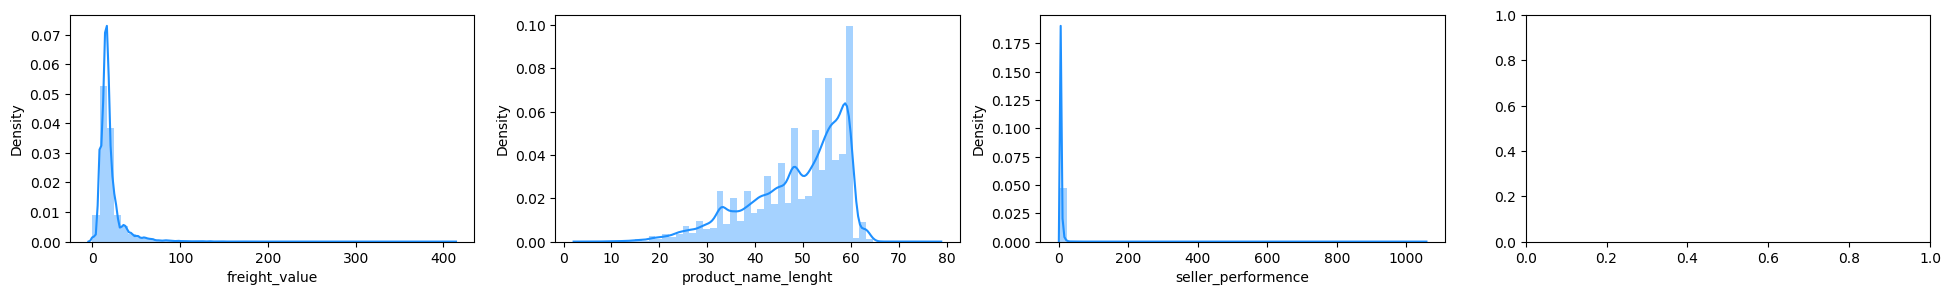

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(24, 3), sharey=False, dpi=100)
sns.distplot(final_df['freight_value'], ax=axes[0],color="dodgerblue")
sns.distplot(final_df['product_name_lenght'], ax=axes[1],color="dodgerblue")
sns.distplot(final_df['seller_performence'], ax=axes[2],color="dodgerblue")
# sns.distplot(final_df['product_photos_qty'], ax=axes[3],color="dodgerblue")

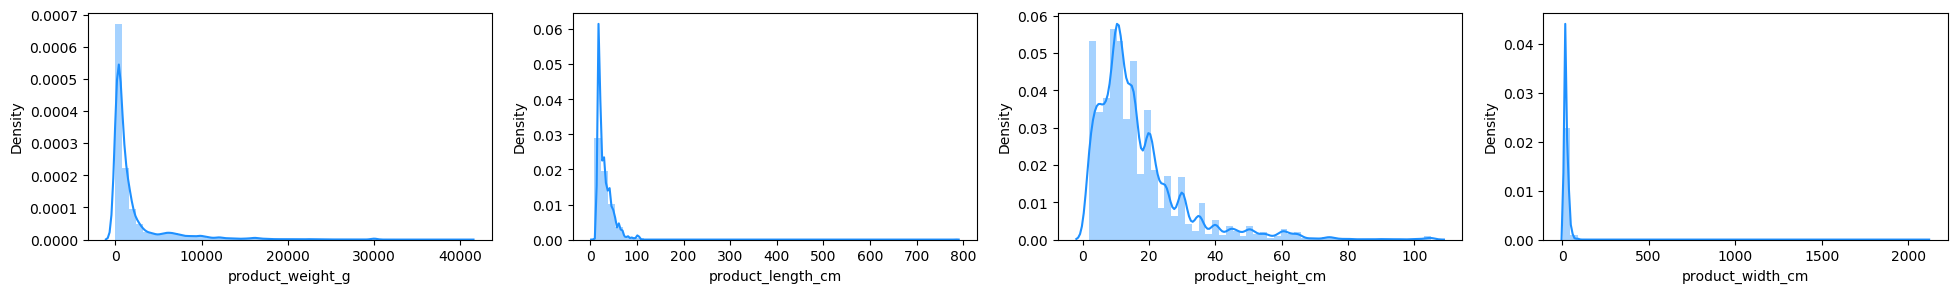

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(24, 3), sharey=False, dpi=100)
sns.distplot(final_df['product_weight_g'], ax=axes[0],color="dodgerblue")
sns.distplot(final_df['product_length_cm'], ax=axes[1],color="dodgerblue")
sns.distplot(final_df['product_height_cm'], ax=axes[2],color="dodgerblue")
sns.distplot(final_df['product_width_cm'], ax=axes[3],color="dodgerblue")

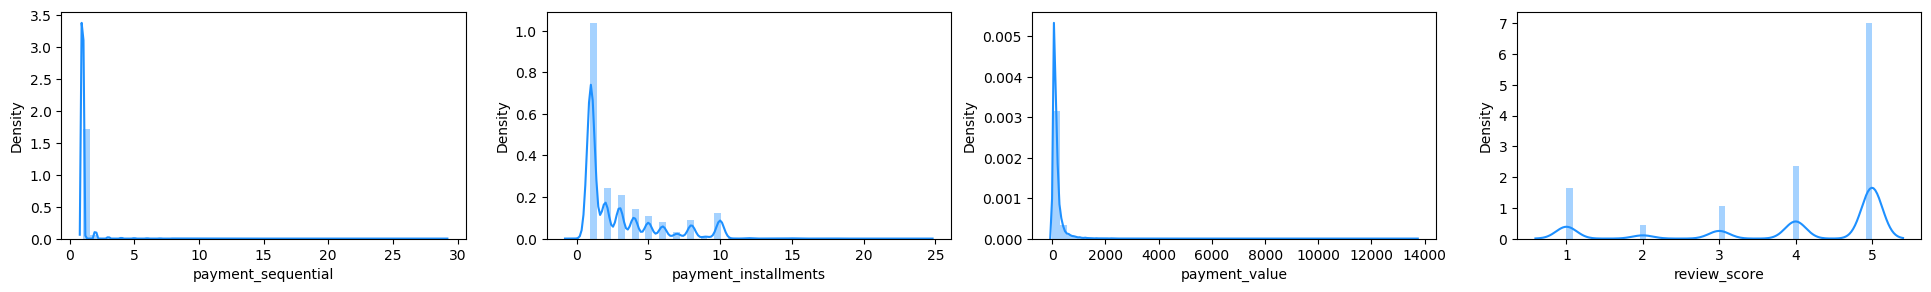

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(24, 3), sharey=False, dpi=100)
sns.distplot(final_df['payment_sequential'], ax=axes[0],color="dodgerblue")
sns.distplot(final_df['payment_installments'], ax=axes[1],color="dodgerblue")
sns.distplot(final_df['payment_value'], ax=axes[2],color="dodgerblue")
sns.distplot(final_df['review_score'], ax=axes[3],color="dodgerblue")

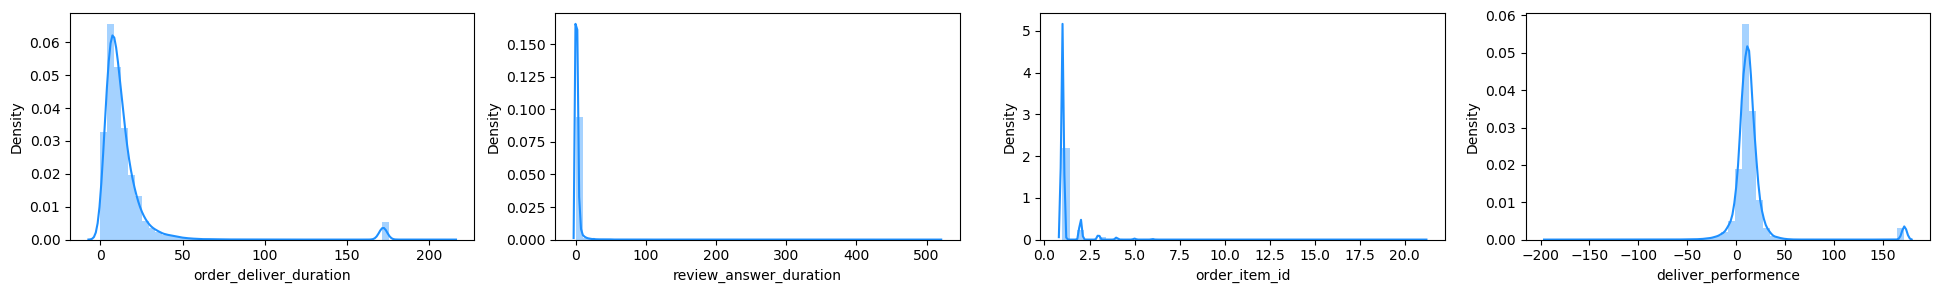

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(24, 3), sharey=False, dpi=100)
sns.distplot(final_df['order_deliver_duration'], ax=axes[0],color="dodgerblue")
sns.distplot(final_df['review_answer_duration'], ax=axes[1],color="dodgerblue")
sns.distplot(final_df['order_item_id'], ax=axes[2],color="dodgerblue")
sns.distplot(final_df['deliver_performence'], ax=axes[3],color="dodgerblue")

In [46]:
# 把商品的長、寬、高根據中華郵政的包裹規定做分類
# 尺寸(長+寬+高) 重量(g)
display(final_df[['product_weight_g','product_length_cm','product_height_cm','product_width_cm']].head())
final_df['size'] = final_df['product_width_cm'] + final_df['product_length_cm'] + final_df['product_height_cm']
display(final_df['size'].head())

final_df.loc[(final_df['size'] >= 0) & (final_df['size'] < 60),'size'] = 1
final_df.loc[(final_df['size'] >= 60) & (final_df['size'] < 90),'size'] = 2
final_df.loc[(final_df['size'] >= 90) & (final_df['size'] < 120),'size'] = 3
final_df.loc[(final_df['size'] >= 120) & (final_df['size'] < 150),'size'] = 4
final_df.loc[(final_df['size'] >= 150),'size'] = 5
display(final_df['size'].value_counts())

final_df.loc[(final_df['product_weight_g'] >= 0) & (final_df['product_weight_g'] < 5000),'product_weight_g'] = 1
final_df.loc[(final_df['product_weight_g'] >= 5000) & (final_df['product_weight_g'] < 10000),'product_weight_g'] = 2
final_df.loc[(final_df['product_weight_g'] >= 10000) & (final_df['product_weight_g'] < 15000),'product_weight_g'] = 3
final_df.loc[(final_df['product_weight_g'] >= 15000) & (final_df['product_weight_g'] < 20000),'product_weight_g'] = 4
final_df.loc[(final_df['product_weight_g'] >= 20000),'product_weight_g'] = 5
display(final_df['product_weight_g'].value_counts())

final_df = final_df.drop(['product_length_cm','product_height_cm','product_width_cm'],axis = 1)

# 把評價小於3分的視為不滿意，大於3分視為滿意
final_df.loc[(final_df['review_score'] >= 0) & (final_df['review_score'] <= 3),'review_score'] = 0
final_df.loc[(final_df['review_score'] > 3),'review_score'] = 1

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,650.0,28.0,9.0,14.0
1,30000.0,50.0,30.0,40.0
2,3050.0,33.0,13.0,33.0
3,200.0,16.0,10.0,15.0
4,3750.0,35.0,40.0,30.0


0     51.0
1    120.0
2     79.0
3     41.0
4    105.0
Name: size, dtype: float64

1.0    54414
2.0    34789
3.0    18862
4.0     7845
5.0     2408
Name: size, dtype: int64

1.0    103488
2.0      9134
3.0      3118
4.0      1581
5.0       997
Name: product_weight_g, dtype: int64

# Feature Scaling
Data Normalization
Normalization refers to rescaling real valued numeric attributes into the range 0 and 1
最大值變為1，最小值變為0

Data Standardization
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance).
將資料常態分布化，平均值會變為0, 標準差變為1，使離群值影響降低(MinMaxScaler與StandardScaler類似)

Binarize Data
資料二元化(0或者1)

Data Rescaling
將資料等比例縮放到0與1之間(MinMaxScaler)

# 數值欄位依各自情況決定使用哪種方法

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

In [48]:
# 範例:order_item_id = 訂購的數量
# 87%的消費者的訂單僅購買1件商品
# 8%的消費者的訂單僅購買2件商品

display(final_df['price'].value_counts().head(5))
print('購買數量比例(1件商品):',format(103653 / 118318,'.3f'))
print('購買數量比例(2件商品):',format(10317 / 118318,'.3f'),'\n') 

min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
max_abs_scaler = MaxAbsScaler()
robust_scaler = RobustScaler()
qt_scaler = QuantileTransformer()
power_scaler = PowerTransformer(method='yeo-johnson')
uvs_scaler = Normalizer(norm = 'l2')
mean_scaler = Normalizer()

x = final_df['price'].values.reshape(-1,1)

print('Feature Scaling的全距')
print('MinMaxScaler:',min_max_scaler.fit_transform(x).max() - min_max_scaler.fit_transform(x).min())
print('StandardScaler:',std_scaler.fit_transform(x).max() - std_scaler.fit_transform(x).min())
print('MaxAbsScaler:',max_abs_scaler.fit_transform(x).max() - max_abs_scaler.fit_transform(x).min())
print('RobustScaler:',robust_scaler.fit_transform(x).max() - robust_scaler.fit_transform(x).min())
print('QuantileTransformer:',qt_scaler.fit_transform(x).max() - qt_scaler.fit_transform(x).min())
print('PowerTransformer:',power_scaler.fit_transform(x).max() - power_scaler.fit_transform(x).min())
print('UnitVectorScaler:',uvs_scaler.fit_transform(x).max() - uvs_scaler.fit_transform(x).min())
print('MeanNormalizer:',mean_scaler.fit_transform(x).max() - mean_scaler.fit_transform(x).min())

59.9    2619
69.9    2113
49.9    2051
89.9    1644
99.9    1526
Name: price, dtype: int64

購買數量比例(1件商品): 0.876
購買數量比例(2件商品): 0.087 

Feature Scaling的全距
MinMaxScaler: 1.0
StandardScaler: 36.57738898183338
MaxAbsScaler: 0.9998737936154417
RobustScaler: 70.88578947368421
QuantileTransformer: 1.0
PowerTransformer: 8.983501674982666
UnitVectorScaler: 0.0
MeanNormalizer: 0.0


In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118318 entries, 0 to 118317
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_item_id           118318 non-null  int64  
 1   price                   118318 non-null  float64
 2   freight_value           118318 non-null  float64
 3   order_status            118318 non-null  object 
 4   customer_state          118318 non-null  object 
 5   product_category_name   118318 non-null  object 
 6   product_name_lenght     118318 non-null  float64
 7   product_weight_g        118318 non-null  float64
 8   payment_sequential      118318 non-null  float64
 9   payment_type            118318 non-null  object 
 10  payment_installments    118318 non-null  float64
 11  payment_value           118318 non-null  float64
 12  review_score            118318 non-null  int64  
 13  order_deliver_duration  118318 non-null  float64
 14  deliver_performence 

In [50]:
# final_df['order_item_id'] = mean_scaler.fit_transform(final_df['order_item_id'].values.reshape(-1,1)) # label
final_df['price'] = min_max_scaler.fit_transform(final_df['price'].values.reshape(-1,1))
final_df['freight_value'] = min_max_scaler.fit_transform(final_df['freight_value'].values.reshape(-1,1))
final_df['product_name_lenght'] = min_max_scaler.fit_transform(final_df['product_name_lenght'].values.reshape(-1,1))
# final_df['product_description_lenght'] = min_max_scaler.fit_transform(final_df['product_description_lenght'].values.reshape(-1,1)) # del
# final_df['product_photos_qty'] = mean_scaler.fit_transform(final_df['product_photos_qty'].values.reshape(-1,1)) # label del
# final_df['product_weight_g'] = std_scaler.fit_transform(final_df['product_weight_g'].values.reshape(-1,1)) # label
# final_df['product_length_cm'] = std_scaler.fit_transform(final_df['product_length_cm'].values.reshape(-1,1)) # label
# final_df['product_height_cm'] = std_scaler.fit_transform(final_df['product_height_cm'].values.reshape(-1,1)) # label
# final_df['product_width_cm'] = std_scaler.fit_transform(final_df['product_width_cm'].values.reshape(-1,1)) # label
# final_df['payment_sequential'] = std_scaler.fit_transform(final_df['payment_sequential'].values.reshape(-1,1)) # label
# final_df['payment_installments'] = std_scaler.fit_transform(final_df['payment_installments'].values.reshape(-1,1)) # label
final_df['payment_value'] = power_scaler.fit_transform(final_df['payment_value'].values.reshape(-1,1))
# final_df['review_score'] = std_scaler.fit_transform(final_df['review_score'].values.reshape(-1,1)) # label
final_df['order_deliver_duration'] = power_scaler.fit_transform(final_df['order_deliver_duration'].values.reshape(-1,1))
final_df['review_answer_duration'] = power_scaler.fit_transform(final_df['review_answer_duration'].values.reshape(-1,1))
final_df['deliver_performence'] = power_scaler.fit_transform(final_df['deliver_performence'].values.reshape(-1,1))
final_df['seller_performence'] = power_scaler.fit_transform(final_df['seller_performence'].values.reshape(-1,1))

In [51]:
final_df['price'] = power_scaler.fit_transform(final_df['price'].values.reshape(-1,1))
final_df['freight_value'] = power_scaler.fit_transform(final_df['freight_value'].values.reshape(-1,1))
final_df['product_name_lenght'] = power_scaler.fit_transform(final_df['product_name_lenght'].values.reshape(-1,1))
final_df['payment_value'] = min_max_scaler.fit_transform(final_df['payment_value'].values.reshape(-1,1))
final_df['order_deliver_duration'] = min_max_scaler.fit_transform(final_df['order_deliver_duration'].values.reshape(-1,1))
final_df['review_answer_duration'] = min_max_scaler.fit_transform(final_df['review_answer_duration'].values.reshape(-1,1))
final_df['deliver_performence'] = min_max_scaler.fit_transform(final_df['deliver_performence'].values.reshape(-1,1))
final_df['seller_performence'] = min_max_scaler.fit_transform(final_df['seller_performence'].values.reshape(-1,1))

In [52]:
final_df.head()

,order_item_id,price,freight_value,order_status,customer_state,product_category_name,product_name_lenght,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_deliver_duration,deliver_performence,review_answer_duration,seller_performence,size
0,1,-0.427686,-0.517304,delivered,RJ,cool_stuff,1.041302,1.0,1.0,credit_card,2.0,0.417202,1,0.537799,0.799222,0.256718,0.251882,1.0
1,1,1.529151,0.376543,delivered,SP,pet_shop,0.729183,5.0,1.0,credit_card,3.0,0.550887,1,0.677180,0.788692,0.378137,0.286790,4.0
2,1,1.276940,0.133542,delivered,MG,furniture_decor,1.206698,1.0,1.0,credit_card,5.0,0.531657,1,0.537799,0.807176,0.000000,0.158396,2.0
3,1,-1.476720,-0.598947,delivered,SP,perfumery,-0.869799,1.0,1.0,credit_card,2.0,0.314838,1,0.510477,0.794153,0.000000,0.286790,1.0
4,1,1.283308,0.166988,delivered,SP,garden_tools,1.206698,1.0,1.0,credit_card,3.0,0.532228,1,0.745688,0.810236,0.256718,0.342504,3.0


# onehot encoding

In [53]:
final_df = pd.get_dummies(final_df,['order_status','customer_state','product_category_name','payment_type'])
final_df.head()

,order_item_id,price,freight_value,product_name_lenght,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,order_deliver_duration,deliver_performence,review_answer_duration,seller_performence,size,order_status_approved,order_status_canceled,order_status_delivered,order_status_invoiced,order_status_processing,order_status_shipped,order_status_unavailable,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,customer_state_PA,customer_state_PB,customer_state_PE,customer_state_PI,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,product_category_name_agro_industry_and_commerce,product_category_name_air_conditioning,product_category_name_art,product_category_name_arts_and_craftmanship,product_category_name_audio,product_category_name_auto,product_category_name_baby,product_category_name_bed_bath_table,product_category_name_books_general_interest,product_category_name_books_imported,product_category_name_books_technical,product_category_name_cds_dvds_musicals,product_category_name_christmas_supplies,product_category_name_cine_photo,product_category_name_computers,product_category_name_computers_accessories,product_category_name_consoles_games,product_category_name_construction_tools_construction,product_category_name_construction_tools_lights,product_category_name_construction_tools_safety,product_category_name_cool_stuff,product_category_name_costruction_tools_garden,product_category_name_costruction_tools_tools,product_category_name_diapers_and_hygiene,product_category_name_drinks,product_category_name_dvds_blu_ray,product_category_name_electronics,product_category_name_fashio_female_clothing,product_category_name_fashion_bags_accessories,product_category_name_fashion_childrens_clothes,product_category_name_fashion_male_clothing,product_category_name_fashion_shoes,product_category_name_fashion_sport,product_category_name_fashion_underwear_beach,product_category_name_fixed_telephony,product_category_name_flowers,product_category_name_food,product_category_name_food_drink,product_category_name_furniture_bedroom,product_category_name_furniture_decor,product_category_name_furniture_living_room,product_category_name_furniture_mattress_and_upholstery,product_category_name_garden_tools,product_category_name_health_beauty,product_category_name_home_appliances,product_category_name_home_appliances_2,product_category_name_home_comfort_2,product_category_name_home_confort,product_category_name_home_construction,product_category_name_housewares,product_category_name_industry_commerce_and_business,product_category_name_kitchen_dining_laundry_garden_furniture,product_category_name_la_cuisine,product_category_name_luggage_accessories,product_category_name_market_place,product_category_name_music,product_category_name_musical_instruments,product_category_name_none,product_category_name_office_furniture,product_category_name_party_supplies,product_category_name_perfumery,product_category_name_pet_shop,product_category_name_security_and_services,product_category_name_signaling_and_security,product_category_name_small_appliances,product_category_name_small_appliances_home_oven_and_coffee,product_category_name_sports_leisure,product_category_name_stationery,product_category_name_tablets_printing_image,product_category_name_telephony,product_category_name_toys,product_category_name_watches_gifts,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,1,-0.427686,-0.517304,1.041302,1.0,1.0,2.0,0.417202,1,0.537799,0.799222,0.256718,0.251882,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# kmeans分群

In [54]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt

[51.4 63.  69.4 74.1 77.9 81.1 84.2 85.9 87.4 88.7]


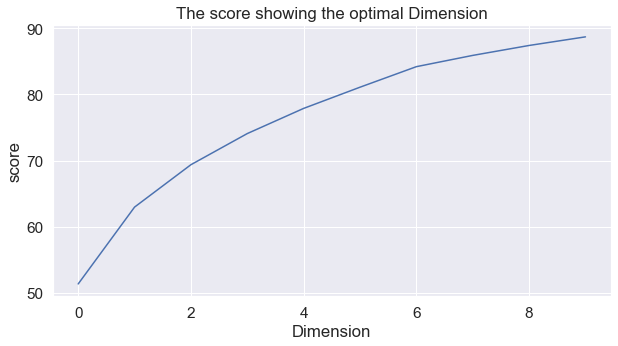

In [79]:
# 決定pca維度

# 隨機抽樣
random_df = final_df.sample(frac = 0.4)

# PCA
pca = PCA(10)
pca.fit(random_df)
varience = pca.explained_variance_ratio_
var = np.cumsum(np.round(varience,decimals = 3) * 100)
print(var)
fig = plt.figure(figsize = (10,5))
plt.xlabel('Dimension')
plt.ylabel('score')
plt.title('The score showing the optimal Dimension')   
plt.plot(var)



In [80]:
pca = PCA(15)
pca_df = pca.fit_transform(random_df)

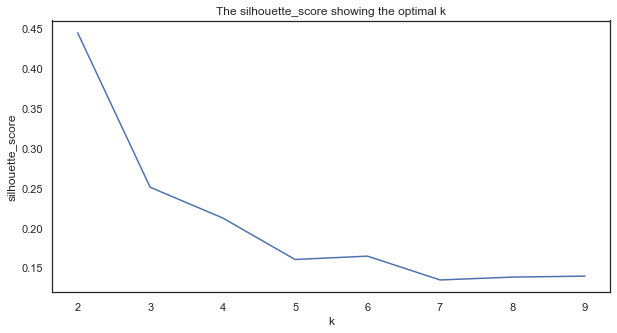

In [81]:
# silhouette_score
sns.set(style = 'white')
fig = plt.figure(figsize = (10,5))
silhouette_avg = []
for i in range(2,10):
    kmeans_fit = KMeans(n_clusters = i).fit(pca_df)
    silhouette_avg.append(silhouette_score(pca_df, kmeans_fit.labels_))
    
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('The silhouette_score showing the optimal k')    
plt.plot(range(2,10), silhouette_avg)

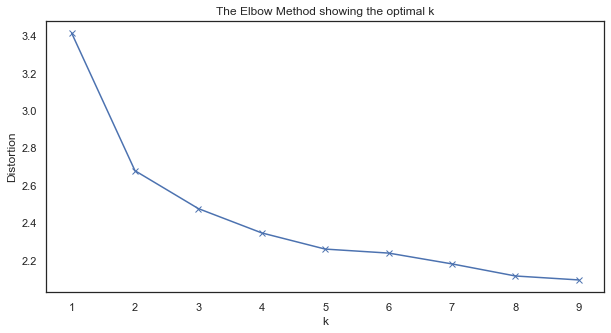

In [82]:
# elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(pca_df)
    distortions.append(sum(np.min(cdist(pca_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pca_df.shape[0])
    
sns.set(style = 'white')
fig = plt.figure(figsize = (10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [83]:
# 決定好k值後再分群
kmeans = KMeans(n_clusters = 3,init ='k-means++',max_iter = 300,n_init = 10)
kmeans.fit(pca_df)
y_kmeans = kmeans.fit_predict(pca_df)

In [84]:
# 把跑出來的結果合併回去random_df
random_df['cluster'] = y_kmeans
display(pd.DataFrame(y_kmeans))
display(random_df.head())

,0
0,1
1,2
2,0
3,0
4,0
...,...
47322,0
47323,0
47324,2
47325,2


,order_item_id,price,freight_value,product_name_lenght,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,order_deliver_duration,deliver_performence,review_answer_duration,seller_performence,size,order_status_approved,order_status_canceled,order_status_delivered,order_status_invoiced,order_status_processing,order_status_shipped,order_status_unavailable,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,customer_state_PA,customer_state_PB,customer_state_PE,customer_state_PI,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,product_category_name_agro_industry_and_commerce,product_category_name_air_conditioning,product_category_name_art,product_category_name_arts_and_craftmanship,product_category_name_audio,product_category_name_auto,product_category_name_baby,product_category_name_bed_bath_table,product_category_name_books_general_interest,product_category_name_books_imported,product_category_name_books_technical,product_category_name_cds_dvds_musicals,product_category_name_christmas_supplies,product_category_name_cine_photo,product_category_name_computers,product_category_name_computers_accessories,product_category_name_consoles_games,product_category_name_construction_tools_construction,product_category_name_construction_tools_lights,product_category_name_construction_tools_safety,product_category_name_cool_stuff,product_category_name_costruction_tools_garden,product_category_name_costruction_tools_tools,product_category_name_diapers_and_hygiene,product_category_name_drinks,product_category_name_dvds_blu_ray,product_category_name_electronics,product_category_name_fashio_female_clothing,product_category_name_fashion_bags_accessories,product_category_name_fashion_childrens_clothes,product_category_name_fashion_male_clothing,product_category_name_fashion_shoes,product_category_name_fashion_sport,product_category_name_fashion_underwear_beach,product_category_name_fixed_telephony,product_category_name_flowers,product_category_name_food,product_category_name_food_drink,product_category_name_furniture_bedroom,product_category_name_furniture_decor,product_category_name_furniture_living_room,product_category_name_furniture_mattress_and_upholstery,product_category_name_garden_tools,product_category_name_health_beauty,product_category_name_home_appliances,product_category_name_home_appliances_2,product_category_name_home_comfort_2,product_category_name_home_confort,product_category_name_home_construction,product_category_name_housewares,product_category_name_industry_commerce_and_business,product_category_name_kitchen_dining_laundry_garden_furniture,product_category_name_la_cuisine,product_category_name_luggage_accessories,product_category_name_market_place,product_category_name_music,product_category_name_musical_instruments,product_category_name_none,product_category_name_office_furniture,product_category_name_party_supplies,product_category_name_perfumery,product_category_name_pet_shop,product_category_name_security_and_services,product_category_name_signaling_and_security,product_category_name_small_appliances,product_category_name_small_appliances_home_oven_and_coffee,product_category_name_sports_leisure,product_category_name_stationery,product_category_name_tablets_printing_image,product_category_name_telephony,product_category_name_toys,product_category_name_watches_gifts,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,cluster
13155,2,-0.276050,0.010493,-0.784406,1.0,1.0,10.0,0.504573,1,0.599657,0.807176,0.506543,0.251882,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

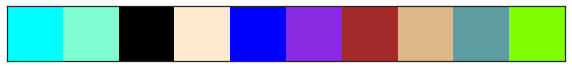

In [85]:
# 設定分群顏色
cnames = {
'aqua':                 '#00FFFF',
'aquamarine':           '#7FFFD4',
'black':                '#000000',
'blanchedalmond':       '#FFEBCD',
'blue':                 '#0000FF',
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chartreuse':           '#7FFF00'}

colors_selected = []
for k in cnames:
    colors_selected.append(str(k))
colors_selected

sns.palplot(colors_selected)

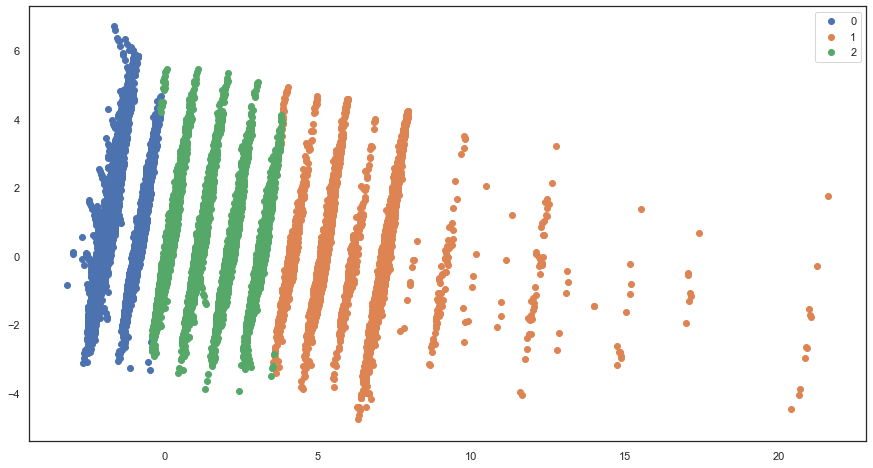

In [86]:
# 視覺化分群圖
sns.set(style = 'white')
fig = plt.figure(figsize = (15,8))
for i in range(5):
    cluster = pca_df[y_kmeans == i]
    plt.legend(labels=[0,1,2],loc='best')
    plt.scatter(cluster[:,0] , cluster[:,1])

# 查看特徵重要程度

In [74]:
# check feature importance
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 讀入資料
x = final_df.drop(['review_score'],axis = 1)
y = final_df['review_score']

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3)

feature_names = [f'{i}' for i in x.columns]
forest = RandomForestClassifier(random_state=0)
forest.fit(train_X, train_y)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
indices = np.argsort(importances)

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names)
top_10_feature = forest_importances.sort_values(ascending=False)[:10]
display(top_10_feature)


Elapsed time to compute the importances: 0.061 seconds


deliver_performence       0.134449
order_deliver_duration    0.124371
payment_value             0.094684
price                     0.085965
freight_value             0.084093
product_name_lenght       0.067505
seller_performence        0.051910
review_answer_duration    0.046978
payment_installments      0.035617
size                      0.025110
dtype: float64

In [75]:
top_10_feature = pd.DataFrame(top_10_feature,columns = ['importance'])
top_10_feature['feature'] = top_10_feature.index
top_10_feature = top_10_feature.reset_index()
top_10_feature = top_10_feature.drop(['index'],axis = 1)
display(top_10_feature)

,importance,feature
0,0.134449,deliver_performence
1,0.124371,order_deliver_duration
2,0.094684,payment_value
3,0.085965,price
4,0.084093,freight_value
5,0.067505,product_name_lenght
6,0.051910,seller_performence
7,0.046978,review_answer_duration
8,0.035617,payment_installments
9,0.025110,size


Text(0, 0.5, 'Mean decrease in impurity')

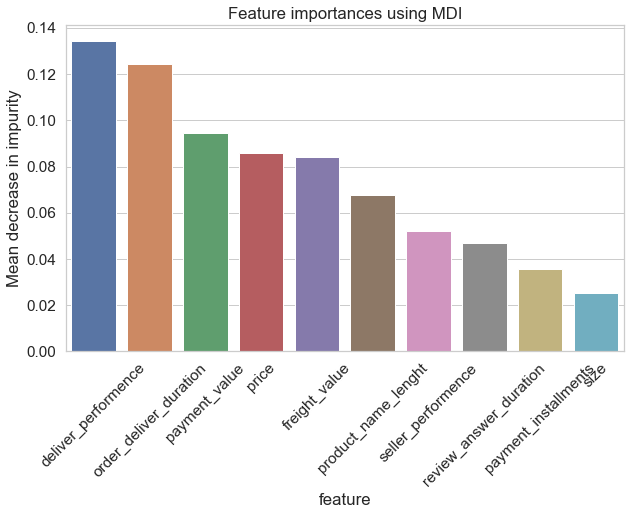

In [76]:
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
ax = sns.barplot(x="feature", y="importance", data=top_10_feature)
plt.xticks(rotation=45)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

# 建立模型預測review_score

In [48]:
# 先透過分層抽樣平衡樣本分佈
# bad = final_df[final_df['review_score'] == 0]
# good = final_df[final_df['review_score'] == 1].sample(30000)
# total = pd.concat([bad,good])

# 決策樹

In [49]:
# 讀入資料
from sklearn.model_selection import train_test_split
from sklearn import metrics
x = total.drop(['review_score'],axis = 1)
y = total['review_score']

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3)

best max_depth: 12


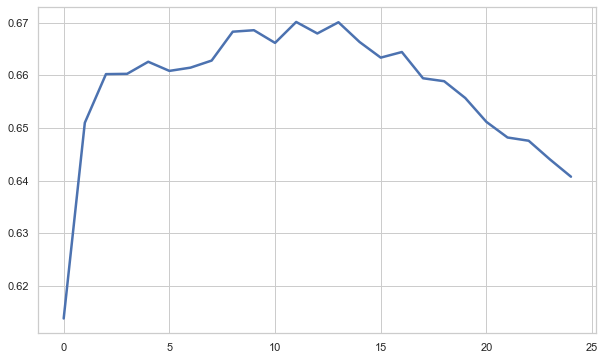

In [259]:
# 找dt最佳的max_depth
accuracies = []
for i in range(1,26):
    clf = tree.DecisionTreeClassifier(max_depth = i,splitter = 'best')
    dt_clf = clf.fit(train_X, train_y)
    test_y_predicted = dt_clf.predict(test_X)
    accuracy = metrics.accuracy_score(test_y, test_y_predicted)
    accuracies.append(accuracy)

plt.figure(figsize = (10,6))
sns.set(style = "whitegrid")
sns.lineplot(data = accuracies,linewidth=2.5)

appr_k = accuracies.index(max(accuracies)) + 1
print('best max_depth:',appr_k)

In [25]:
# DT
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 讀入資料
x = final_df.drop(['review_score'],axis = 1)
y = final_df['review_score']

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3)

# 建立分類器
clf = tree.DecisionTreeClassifier(max_depth = 30)
dt_clf = clf.fit(x, y)

# 預測
test_y_predicted = dt_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)

# 績效
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
report = classification_report(test_y,test_y_predicted)
dt_cfm = confusion_matrix(test_y,test_y_predicted)

print(accuracy)
print(report)
print(dt_cfm)

# 樹狀圖
# text_representation = tree.export_text(dt_clf)
# print(text_representation)
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf, feature_names=final_df.columns, filled=True)

[1 1 1 ... 1 0 0]
26919     1
31672     1
39228     1
112769    1
114559    0
         ..
11948     1
77003     1
87000     1
2606      0
36675     0
Name: review_score, Length: 35496, dtype: int64
0.949149199909849
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8897
           1       0.94      0.99      0.97     26599

    accuracy                           0.95     35496
   macro avg       0.96      0.90      0.93     35496
weighted avg       0.95      0.95      0.95     35496

[[ 7257  1640]
 [  165 26434]]


In [ ]:
# dt confusion matrix
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(dt_cfm, annot=True, annot_kws={"size": 16}, fmt='d', xticklabels=[0,1],yticklabels=[0,1],cmap="YlGnBu")


In [64]:
# 讀入資料
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import metrics
x = final_df.drop(['review_score'],axis = 1)
y = final_df['review_score']

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3)

In [65]:
# KNN選擇k
from sklearn import neighbors

accuracies = []
for i in range(1,20):
    clf = neighbors.KNeighborsClassifier(n_neighbors = i,n_jobs = 1)
    knn_clf = clf.fit(train_X, train_y)
    test_y_predicted = knn_clf.predict(test_X)
    accuracy = metrics.accuracy_score(test_y, test_y_predicted)
    accuracies.append(accuracy)



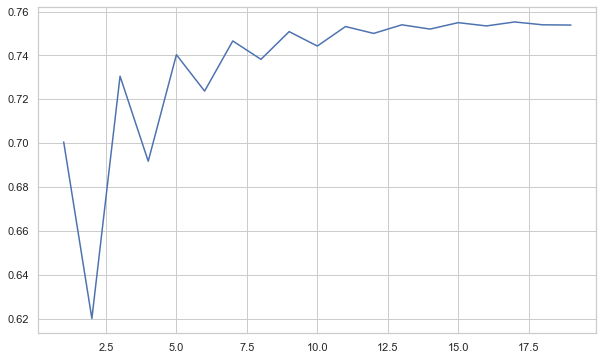

17


In [67]:
# 視覺化knn最佳的n_neighbors=k
plt.figure(figsize = (10,6))
sns.set(style = "whitegrid")
plt.plot(range(1,20),accuracies)
plt.show()

appr_k = accuracies.index(max(accuracies)) + 1
print(appr_k)

In [59]:
# 找出參數組合最佳解
from sklearn.model_selection import GridSearchCV
tree_param_grid = {'n_neighbors': list((5,10,50,100)),'leaf_size':list((30,60,100,150))}
grid = GridSearchCV(neighbors.KNeighborsClassifier(),param_grid=tree_param_grid, cv=5,n_jobs = 1)
grid.fit(train_X, train_y)
grid.cv_results_.keys()


In [58]:
print(grid.cv_results_.keys())
print(grid.best_params_, grid.best_score_)
for i in ['mean_test_score', 'std_test_score', 'param_n_neighbors']:
    print(i," : ",grid.cv_results_[i])

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_leaf_size', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
{'leaf_size': 30, 'n_neighbors': 100} 0.5824003628465956
mean_test_score  :  [0.56375109 0.56459006 0.57942791 0.58240036 0.56375109 0.56459006
 0.57942791 0.58240036 0.56375109 0.56459006 0.57942791 0.58240036
 0.56375109 0.56459006 0.57942791 0.58240036]
std_test_score  :  [0.00344028 0.00545494 0.00432195 0.00322447 0.00344028 0.00545494
 0.00432195 0.00322447 0.00344028 0.00545494 0.00432195 0.00322447
 0.00344028 0.00545494 0.00432195 0.00322447]
param_n_neighbors  :  [5 10 50 100 5 10 50 100 5 10 50 100 5 10 50 100]


In [68]:
# KNN
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 讀入資料
x = final_df.drop(['review_score'],axis = 1)
y = final_df['review_score']

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3)

# 建立分類器
clf = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_clf = clf.fit(x, y)

# 預測
test_y_predicted = knn_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)

# 績效
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
report = classification_report(test_y,test_y_predicted)
knn_cfm = confusion_matrix(test_y,test_y_predicted)

print(accuracy)
print(report)

[1 1 1 ... 1 1 0]
39029    1
40181    1
64144    1
21582    1
55326    1
        ..
95654    0
38189    1
19803    1
80512    1
26132    0
Name: review_score, Length: 35496, dtype: int64
0.8177822853279243
              precision    recall  f1-score   support

           0       0.78      0.39      0.52      8950
           1       0.82      0.96      0.89     26546

    accuracy                           0.82     35496
   macro avg       0.80      0.68      0.70     35496
weighted avg       0.81      0.82      0.79     35496



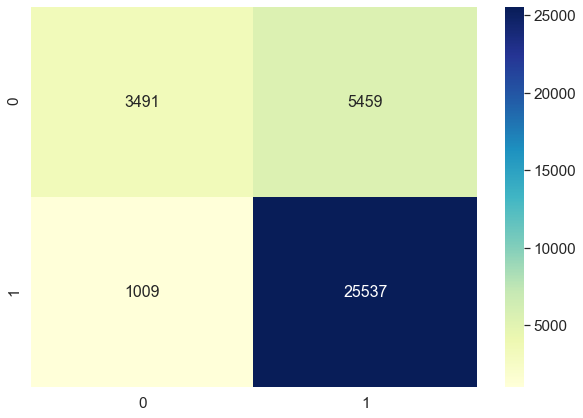

In [69]:
# knn confusion matrix
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(knn_cfm, annot=True, annot_kws={"size": 16}, fmt='d', xticklabels=[0,1],yticklabels=[0,1],cmap="YlGnBu")


# 隨機森林

In [178]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # 讀入資料
# x = total.drop(['review_score'],axis = 1)
# y = total['review_score']

# # 切分訓練與測試資料
# train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3)

# # 找最佳n_estimators
# scores =[]
# for i in range(100,200):
#     rfc = RandomForestClassifier(n_estimators=i)
#     rfc.fit(train_X, train_y)
#     y_pred = rfc.predict(test_X)
#     scores.append(accuracy_score(test_y, y_pred))

# import matplotlib.pyplot as plt
# %matplotlib inline

# # plot the relationship between K and testing accuracy
# # plt.plot(x_axis, y_axis)
# plt.plot(range(100, 200), scores)
# plt.xlabel('Value of n_estimators for Random Forest Classifier')
# plt.ylabel('Testing Accuracy')

best max_depth: 19


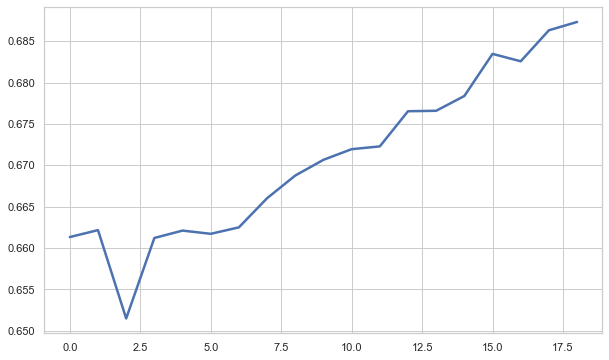

In [262]:
# 找rf最佳的max_depth
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracies = []
for i in range(1,20):
    clf = RandomForestClassifier(max_depth = i)
    dt_clf = clf.fit(train_X, train_y)
    test_y_predicted = dt_clf.predict(test_X)
    accuracy = metrics.accuracy_score(test_y, test_y_predicted)
    accuracies.append(accuracy)

plt.figure(figsize = (10,6))
sns.set(style = "whitegrid")
sns.lineplot(data = accuracies,linewidth=2.5)

appr_k = accuracies.index(max(accuracies)) + 1
print('best max_depth:',appr_k)

In [263]:
# rf
from sklearn.ensemble import RandomForestClassifier

# 讀入資料
x = total.drop(['review_score'],axis = 1)
y = total['review_score']

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3)

# 建立分類器
clf = RandomForestClassifier(n_jobs = -1,max_depth = 20)
rf_clf = clf.fit(x, y)

# 預測
test_y_predicted = rf_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)

# 績效
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
report = classification_report(test_y,test_y_predicted)
rf_cfm = confusion_matrix(test_y,test_y_predicted)

print(accuracy)
print(report)

[1 1 1 ... 0 1 1]
116044    1
59545     1
70457     0
89480     1
87408     1
         ..
116667    1
91017     1
56700     1
39459     1
71145     1
Name: review_score, Length: 17879, dtype: int64
0.7914312881033615
              precision    recall  f1-score   support

           0       0.92      0.63      0.75      8789
           1       0.72      0.95      0.82      9090

    accuracy                           0.79     17879
   macro avg       0.82      0.79      0.78     17879
weighted avg       0.82      0.79      0.79     17879



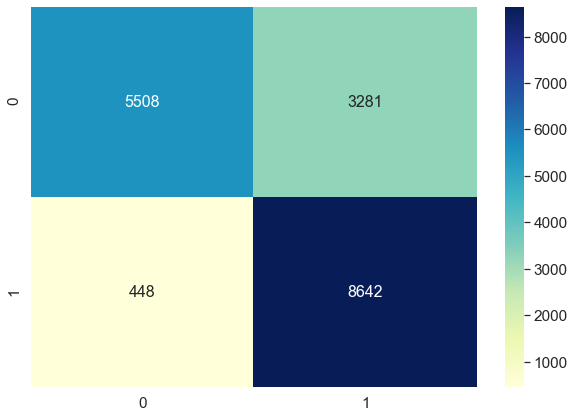

In [264]:
# rf confusion matrix
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(rf_cfm, annot=True, annot_kws={"size": 16}, fmt='d', xticklabels=[0,1],yticklabels=[0,1],cmap="YlGnBu")

In [ ]:
# xgboost
from xgboost.sklearn import XGBClassifier

# 讀入資料
x = final_df.drop(['review_score'],axis = 1)
y = final_df['review_score']

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3)

# 建立分類器
clf = XGBClassifier(
        #樹的個數
        n_estimators=100,
        # 如同學習率
        learning_rate= 0.3, 
        # 構建樹的深度，越大越容易過擬合    
        max_depth=6, 
        # 隨機取樣訓練樣本 訓練例項的子取樣比
        subsample=1, 
        # 用於控制是否後剪枝的引數,越大越保守，一般0.1、0.2這樣子
        gamma=0.2, 
        # 控制模型複雜度的權重值的L2正則化項引數，引數越大，模型越不容易過擬合。
        reg_lambda=1,  
        #最大增量步長，我們允許每個樹的權重估計。
        max_delta_step=0,
        # 生成樹時進行的列取樣 
        colsample_bytree=1, 

        # 這個引數預設是 1，是每個葉子裡面 h 的和至少是多少，對正負樣本不均衡時的 0-1 分類而言
        # 假設 h 在 0.01 附近，min_child_weight 為 1 意味著葉子節點中最少需要包含 100 個樣本。
        #這個引數非常影響結果，控制葉子節點中二階導的和的最小值，該引數值越小，越容易 overfitting。
        min_child_weight=1, 

        #隨機種子
        seed=1000,
        objective= 'multi:softmax',
        num_class=5) 
xgb_clf = clf.fit(x, y)

# 預測
test_y_predicted = xgb_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)

# 績效
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
report = classification_report(test_y,test_y_predicted)
xgb_cfm = confusion_matrix(test_y,test_y_predicted)

print(accuracy)
print(report)


        
        # L1 正則項引數
#        reg_alpha=0,
        
        #如果取值大於0的話，在類別樣本不平衡的情況下有助於快速收斂。平衡正負權重
        #scale_pos_weight=1,
        
        #多分類的問題 指定學習任務和相應的學習目標
        #objective= 'multi:softmax', 
        
        # 類別數，多分類與 multisoftmax 並用
        #num_class=10,
        
        # 設定成1則沒有執行資訊輸出，最好是設定為0.是否在執行升級時列印訊息。
#        silent=0 ,
        # cpu 執行緒數 預設最大
#        nthread=4,
    
        #eval_metric= 'auc'


In [ ]:
# xgboost confusion matrix
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(xgb_cfm, annot=True, annot_kws={"size": 16}, fmt='d', xticklabels=[0,1],yticklabels=[0,1],cmap="YlGnBu")

# label encode版本

In [351]:
label_df = final_df
label_df.head()

,order_item_id,price,freight_value,order_status,customer_state,product_category_name,product_name_lenght,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_deliver_duration,deliver_performence,review_answer_duration,seller_performence,size
0,1,0.008620,0.032440,delivered,RJ,cool_stuff,0.746479,1.0,1.0,credit_card,2.0,0.005283,1,0.033493,0.545706,0.001931,0.003795,1.0
1,1,0.035498,0.048648,delivered,SP,pet_shop,0.718310,5.0,1.0,credit_card,3.0,0.019016,1,0.076555,0.529086,0.003861,0.004744,4.0
2,1,0.029425,0.043619,delivered,MG,furniture_decor,0.760563,1.0,1.0,credit_card,5.0,0.015872,1,0.033493,0.559557,0.000000,0.001898,2.0
3,1,0.001803,0.031219,delivered,SP,perfumery,0.521127,1.0,1.0,credit_card,2.0,0.001887,1,0.028708,0.537396,0.000000,0.004744,1.0
4,1,0.029558,0.044278,delivered,SP,garden_tools,0.760563,1.0,1.0,credit_card,3.0,0.015957,1,0.119617,0.565097,0.001931,0.006641,3.0


In [354]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

label_df['order_status'] = label_encoder.fit_transform(label_df['order_status'])
label_df['customer_state'] = label_encoder.fit_transform(label_df['customer_state'])
label_df['product_category_name'] = label_encoder.fit_transform(label_df['product_category_name'])
label_df['payment_type'] = label_encoder.fit_transform(label_df['payment_type'])

label_df.head()

,order_item_id,price,freight_value,order_status,customer_state,product_category_name,product_name_lenght,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_deliver_duration,deliver_performence,review_answer_duration,seller_performence,size
0,1,0.008620,0.032440,2,18,20,0.746479,1.0,1.0,1,2.0,0.005283,1,0.033493,0.545706,0.001931,0.003795,1.0
1,1,0.035498,0.048648,2,25,61,0.718310,5.0,1.0,1,3.0,0.019016,1,0.076555,0.529086,0.003861,0.004744,4.0
2,1,0.029425,0.043619,2,10,39,0.760563,1.0,1.0,1,5.0,0.015872,1,0.033493,0.559557,0.000000,0.001898,2.0
3,1,0.001803,0.031219,2,25,60,0.521127,1.0,1.0,1,2.0,0.001887,1,0.028708,0.537396,0.000000,0.004744,1.0
4,1,0.029558,0.044278,2,25,42,0.760563,1.0,1.0,1,3.0,0.015957,1,0.119617,0.565097,0.001931,0.006641,3.0


In [355]:
# 先透過分層抽樣平衡樣本分佈
bad = label_df[label_df['review_score'] == 0]
good = label_df[label_df['review_score'] == 1].sample(30000)
total = pd.concat([bad,good])

# 讀入資料
from sklearn.model_selection import train_test_split
from sklearn import metrics
x = total.drop(['review_score'],axis = 1)
y = total['review_score']

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3)

best max_depth: 10


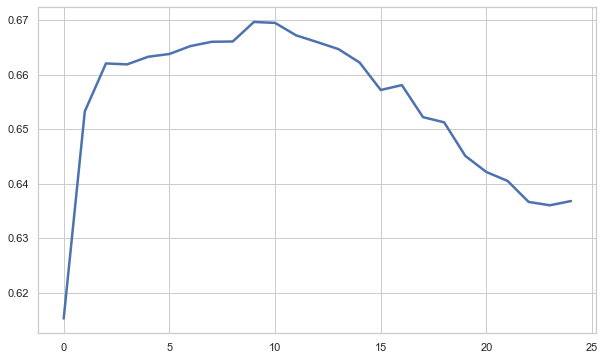

In [356]:
# 找dt最佳的max_depth
accuracies = []
for i in range(1,26):
    clf = tree.DecisionTreeClassifier(max_depth = i,splitter = 'best')
    dt_clf = clf.fit(train_X, train_y)
    test_y_predicted = dt_clf.predict(test_X)
    accuracy = metrics.accuracy_score(test_y, test_y_predicted)
    accuracies.append(accuracy)

plt.figure(figsize = (10,6))
sns.set(style = "whitegrid")
sns.lineplot(data = accuracies,linewidth=2.5)

appr_k = accuracies.index(max(accuracies)) + 1
print('best max_depth:',appr_k)

In [357]:
# DT
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 讀入資料
x = total.drop(['review_score'],axis = 1)
y = total['review_score']

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3)

# 建立分類器
clf = tree.DecisionTreeClassifier(splitter = 'best', max_depth = 10)
dt_clf = clf.fit(x, y)

# 預測
test_y_predicted = dt_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)

# 績效
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
report = classification_report(test_y,test_y_predicted)
dt_cfm = confusion_matrix(test_y,test_y_predicted)

print(accuracy)
print(report)
print(dt_cfm)

[1 1 1 ... 1 1 0]
49178     0
106598    0
49384     1
35828     1
35199     1
         ..
83332     0
30990     0
24798     1
40109     1
117741    0
Name: review_score, Length: 17879, dtype: int64
0.6955086973544382
              precision    recall  f1-score   support

           0       0.76      0.56      0.65      8832
           1       0.66      0.82      0.73      9047

    accuracy                           0.70     17879
   macro avg       0.71      0.69      0.69     17879
weighted avg       0.71      0.70      0.69     17879

[[4980 3852]
 [1592 7455]]


In [358]:
total

,order_item_id,price,freight_value,order_status,customer_state,product_category_name,product_name_lenght,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_deliver_duration,deliver_performence,review_answer_duration,seller_performence,size
8,1,0.021547,0.028437,2,25,43,0.760563,1.0,1.0,1,3.0,0.011534,0,0.043062,0.520776,0.005792,0.003795,1.0
17,1,0.021257,0.021407,2,25,60,0.535211,1.0,1.0,1,1.0,0.011180,0,0.028708,0.531856,0.005792,0.002846,2.0
19,1,0.003586,0.039323,2,25,20,0.647887,1.0,1.0,1,4.0,0.003009,0,0.086124,0.540166,0.000000,0.003795,2.0
20,1,0.006987,0.021675,2,25,7,0.464789,1.0,1.0,1,1.0,0.004155,0,0.014354,0.545706,0.000000,0.003795,2.0
21,1,0.003139,0.028925,2,25,69,0.760563,1.0,1.0,1,3.0,0.002477,0,0.081340,0.515235,0.003861,0.003795,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75949,1,0.051833,0.118532,2,19,43,0.647887,1.0,1.0,1,8.0,0.029161,1,0.148325,0.531856,0.005792,0.005693,2.0
10218,1,0.010981,0.070592,2,15,70,0.507042,1.0,1.0,1,2.0,0.007591,1,0.167464,0.509695,0.003861,0.002846,3.0
99078,1,0.013224,0.029608,2,25,7,0.690141,1.0,1.0,1,4.0,0.007467,1,0.038278,0.559557,0.009653,0.004744,3.0
117166,1,0.004050,0.124292,2,9,5,0.408451,1.0,1.0,0,1.0,0.005785,1,0.076555,0.554017,0.003861,0.002846,2.0


In [31]:
# KNN
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 讀入資料
x = final_df.drop(['review_score'],axis = 1)
y = final_df['review_score']

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3)

# 建立分類器
clf = neighbors.KNeighborsClassifier(n_neighbors = 15)
knn_clf = clf.fit(x, y)

# 預測
test_y_predicted = knn_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)

# 績效
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
report = classification_report(test_y,test_y_predicted)
knn_cfm = confusion_matrix(test_y,test_y_predicted)

print(accuracy)
print(report)
print(knn_cfm)

[1 1 1 ... 1 1 1]
67366     0
50520     1
662       1
89729     1
30957     1
         ..
32082     0
65130     1
46701     0
63598     0
100643    1
Name: review_score, Length: 35496, dtype: int64
0.7851870633310796
              precision    recall  f1-score   support

           0       0.79      0.18      0.29      8767
           1       0.78      0.98      0.87     26729

    accuracy                           0.79     35496
   macro avg       0.79      0.58      0.58     35496
weighted avg       0.79      0.79      0.73     35496

[[ 1543  7224]
 [  401 26328]]


# 關聯演算法

In [512]:
# 先整理出合適的欄位
associate_df = final_df
associate_df.head(5)
associate_df = associate_df.drop(['price','freight_value','product_name_lenght','product_weight_g','product_length_cm','product_height_cm',
                   'product_width_cm','payment_value','order_deliver_duration','review_answer_duration',
                   'deliver_performence','review_answer_duration','seller_performence','payment_value',
                   'payment_installments','payment_sequential','order_item_id'],axis = 1)
associate_df.head(5)                  
                   

,seller_city,order_status,customer_city,customer_state,product_category_name,payment_type,review_score
0,volta redonda,delivered,campos dos goytacazes,RJ,cool_stuff,credit_card,5
1,sao paulo,delivered,santa fe do sul,SP,pet_shop,credit_card,4
2,borda da mata,delivered,para de minas,MG,furniture_decor,credit_card,5
3,franca,delivered,atibaia,SP,perfumery,credit_card,4
4,loanda,delivered,varzea paulista,SP,garden_tools,credit_card,5


In [513]:
associate_df.loc[(associate_df['review_score'] <= 2),'review_score'] = 0
associate_df.loc[(associate_df['review_score'] >= 2),'review_score'] = 1

In [514]:
associate_df.head()

,seller_city,order_status,customer_city,customer_state,product_category_name,payment_type,review_score
0,volta redonda,delivered,campos dos goytacazes,RJ,cool_stuff,credit_card,1
1,sao paulo,delivered,santa fe do sul,SP,pet_shop,credit_card,1
2,borda da mata,delivered,para de minas,MG,furniture_decor,credit_card,1
3,franca,delivered,atibaia,SP,perfumery,credit_card,1
4,loanda,delivered,varzea paulista,SP,garden_tools,credit_card,1


In [519]:
# resample_1000 = associate_df[['payment_type','order_status','product_category_name','review_score','customer_city']].sample(10000)
transactions = associate_df[['payment_type','order_status','product_category_name','review_score','customer_city']].astype(str).values.tolist()
display(transactions)
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
display(df)

[['credit_card', 'delivered', 'cool_stuff', '1', 'campos dos goytacazes'],
 ['credit_card', 'delivered', 'pet_shop', '1', 'santa fe do sul'],
 ['credit_card', 'delivered', 'furniture_decor', '1', 'para de minas'],
 ['credit_card', 'delivered', 'perfumery', '1', 'atibaia'],
 ['credit_card', 'delivered', 'garden_tools', '1', 'varzea paulista'],
 ['boleto', 'delivered', 'housewares', '1', 'uberaba'],
 ['credit_card', 'delivered', 'telephony', '1', 'guararapes'],
 ['credit_card', 'delivered', 'garden_tools', '1', 'praia grande'],
 ['credit_card', 'delivered', 'health_beauty', '0', 'santos'],
 ['credit_card', 'delivered', 'books_technical', '1', 'jandira'],
 ['credit_card', 'delivered', 'health_beauty', '1', 'piracicaba'],
 ['credit_card', 'delivered', 'fashion_bags_accessories', '1', 'monte alto'],
 ['credit_card', 'delivered', 'bed_bath_table', '1', 'rio de janeiro'],
 ['boleto', 'delivered', 'garden_tools', '1', 'jandira'],
 ['boleto', 'delivered', 'garden_tools', '1', 'jandira'],
 ['bol

0     1  abadia dos dourados  abadiania  abaete  abaetetuba  \
0       False  True                False      False   False       False   
1       False  True                False      False   False       False   
2       False  True                False      False   False       False   
3       False  True                False      False   False       False   
4       False  True                False      False   False       False   
...       ...   ...                  ...        ...     ...         ...   
118313  False  True                False      False   False       False   
118314  False  True                False      False   False       False   
118315  False  True                False      False   False       False   
118316  False  True                False      False   False       False   
118317  False  True                False      False   False       False   

        abaiara  abaira  abare  abatia  abdon batista  abelardo luz  abrantes  \
0         False   False  False   False          False         False     False   
1         False   False  False   False          False         False     False   
2         False   False  False   False          False         False     False   
3         False   False  False   False          False         False     False   
4         False   False  False   False          False         False     False   
...         ...     ...    ...     ...            ...           ...       ...   
118313    False   False  False   False          False         False     False   
118314    False   False  False   False          False         False     False   
118315    False   False  False   False          False         False     False   
118316    False   False  False   False          False         False     False   
118317    False   False  False   False          False         False     False   

        abre campo  abreu e lima  acaiaca  acailandia  acajutiba  acarau  \
0            False         False    False       False      False   False   
1            False         False    False       False      False   False   
2            False         False    False       False      False   False   
3            False         False    False       False      False   False   
4            False         False    False       False      False   False   
...            ...           ...      ...         ...        ...     ...   
118313       False         False    False       False      False   False   
118314       False         False    False       False      False   False   
118315       False         False    False       False      False   False   
118316       False         False    False       False      False   False   
118317       False         False    False       False      False   False   

        acari  acegua  acopiara  acreuna    acu  acucena  adamantina  \
0       False   False     False    False  False    False       False   
1       False   False     False    False  False    False       False   
2       False   False     False    False  False    False       False   
3       False   False     False    False  False    False       False   
4       False   False     False    False  False    False       False   
...       ...     ...       ...      ...    ...      ...         ...   
118313  False   False     False    False  False    False       False   
118314  False   False     False    False  False    False       False   
118315  False   False     False    False  False    False       False   
118316  False   False     False    False  False    False       False   
118317  False   False     False    False  False    False       False   

        adhemar de barros  adolfo  adrianopolis  adustina  \
0                   False   False         False     False   
1                   False   False         False     False   
2                   False   False         False     False   
3                   False   False         False     False   
4                   False   False         False     Fal

In [520]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

a_rule = apriori(df, use_colnames = True)
display(a_rule.head())

rules = association_rules(a_rule, metric="lift", min_threshold = 1)
rules

,support,itemsets
0,0.834083,(1)
1,0.737580,(credit_card)
2,0.978135,(delivered)
3,0.615147,"(credit_card, 1)"
4,0.829257,"(delivered, 1)"


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(delivered),(1),0.978135,0.834083,0.829257,0.847794,1.016438,0.013411,1.090081
1,(1),(delivered),0.834083,0.978135,0.829257,0.994214,1.016438,0.013411,3.778935
2,(credit_card),(delivered),0.737580,0.978135,0.721640,0.978389,1.000259,0.000187,1.011728
3,(delivered),(credit_card),0.978135,0.737580,0.721640,0.737771,1.000259,0.000187,1.000729
4,"(credit_card, delivered)",(1),0.721640,0.834083,0.611657,0.847593,1.016197,0.009749,1.088643
5,"(credit_card, 1)",(delivered),0.615147,0.978135,0.611657,0.994326,1.016552,0.009959,3.853235
6,"(delivered, 1)",(credit_card),0.829257,0.737580,0.611657,0.737596,1.000022,0.000013,1.000062
7,(credit_card),"(delivered, 1)",0.737580,0.829257,0.611657,0.829275,1.000022,0.000013,1.000107
8,(delivered),"(credit_card, 1)",0.978135,0.615147,0.611657,0.625329,1.016552,0.009959,1.027176
9,(1),"(credit_card, delivered)",0.834083,0.721640,0.611657,0.733329,1.016197,0.009749,1.043832


支援(Support)：購買X的個數 / 總數
信心(Confidence)：同時購買X及Y的個數 / 購買X的個數，亦即條件機率P(Y|X)，購買X的顧客，有多少顧客也買了Y，Support(X ∩ Y) / Support(X)。
增益(Lift)：P(X ∩ Y) / (P(X) * P(Y))，若值接近1表示X、Y互相獨立，愈高表示關聯性愈強。
Leverage:measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent.
Conviction:compares the probability that X appears without Y if they were dependent with the actual frequency of the appearance of X without Y.

# SMOTE

In [70]:
final_df.head()

,order_item_id,price,freight_value,product_name_lenght,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,order_deliver_duration,deliver_performence,review_answer_duration,seller_performence,size,order_status_approved,order_status_canceled,order_status_delivered,order_status_invoiced,order_status_processing,order_status_shipped,order_status_unavailable,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,customer_state_PA,customer_state_PB,customer_state_PE,customer_state_PI,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,product_category_name_agro_industry_and_commerce,product_category_name_air_conditioning,product_category_name_art,product_category_name_arts_and_craftmanship,product_category_name_audio,product_category_name_auto,product_category_name_baby,product_category_name_bed_bath_table,product_category_name_books_general_interest,product_category_name_books_imported,product_category_name_books_technical,product_category_name_cds_dvds_musicals,product_category_name_christmas_supplies,product_category_name_cine_photo,product_category_name_computers,product_category_name_computers_accessories,product_category_name_consoles_games,product_category_name_construction_tools_construction,product_category_name_construction_tools_lights,product_category_name_construction_tools_safety,product_category_name_cool_stuff,product_category_name_costruction_tools_garden,product_category_name_costruction_tools_tools,product_category_name_diapers_and_hygiene,product_category_name_drinks,product_category_name_dvds_blu_ray,product_category_name_electronics,product_category_name_fashio_female_clothing,product_category_name_fashion_bags_accessories,product_category_name_fashion_childrens_clothes,product_category_name_fashion_male_clothing,product_category_name_fashion_shoes,product_category_name_fashion_sport,product_category_name_fashion_underwear_beach,product_category_name_fixed_telephony,product_category_name_flowers,product_category_name_food,product_category_name_food_drink,product_category_name_furniture_bedroom,product_category_name_furniture_decor,product_category_name_furniture_living_room,product_category_name_furniture_mattress_and_upholstery,product_category_name_garden_tools,product_category_name_health_beauty,product_category_name_home_appliances,product_category_name_home_appliances_2,product_category_name_home_comfort_2,product_category_name_home_confort,product_category_name_home_construction,product_category_name_housewares,product_category_name_industry_commerce_and_business,product_category_name_kitchen_dining_laundry_garden_furniture,product_category_name_la_cuisine,product_category_name_luggage_accessories,product_category_name_market_place,product_category_name_music,product_category_name_musical_instruments,product_category_name_none,product_category_name_office_furniture,product_category_name_party_supplies,product_category_name_perfumery,product_category_name_pet_shop,product_category_name_security_and_services,product_category_name_signaling_and_security,product_category_name_small_appliances,product_category_name_small_appliances_home_oven_and_coffee,product_category_name_sports_leisure,product_category_name_stationery,product_category_name_tablets_printing_image,product_category_name_telephony,product_category_name_toys,product_category_name_watches_gifts,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,1,-0.427686,-0.517304,1.041302,1.0,1.0,2.0,0.417202,1,0.537799,0.799222,0.256718,0.251882,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [71]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [77]:
x = final_df.drop(['review_score'],axis = 1)
y = final_df['review_score']

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3)
over_samples =  SMOTE()  
x_smote,y_smote = over_samples.fit_resample(x,y)

clf = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_clf = clf.fit(x_smote, y_smote)

# 預測
test_y_predicted = knn_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)

# 績效
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
report = classification_report(test_y,test_y_predicted)
knn_cfm = confusion_matrix(test_y,test_y_predicted)

print(accuracy)
print(report)
print(knn_cfm)

[0 1 1 ... 0 1 0]
18054     1
70059     1
36427     0
109726    1
7999      0
         ..
25956     0
112063    1
79521     0
109914    1
34863     1
Name: review_score, Length: 35496, dtype: int64
0.75070430471039
              precision    recall  f1-score   support

           0       0.50      0.89      0.64      8836
           1       0.95      0.70      0.81     26660

    accuracy                           0.75     35496
   macro avg       0.73      0.80      0.72     35496
weighted avg       0.84      0.75      0.77     35496

[[ 7878   958]
 [ 7891 18769]]


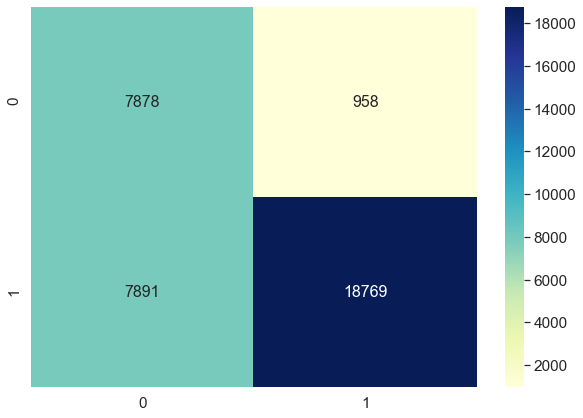

In [78]:
# knn confusion matrix
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(knn_cfm, annot=True, annot_kws={"size": 16}, fmt='d', xticklabels=[0,1],yticklabels=[0,1],cmap="YlGnBu")

In [44]:
from collections import Counter
counter = Counter(y_smote)
print(counter)

Counter({1: 45013, 0: 45013})


In [28]:
# DT
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

x = final_df.drop(['review_score'],axis = 1)
y = final_df['review_score']

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3)
over_samples =  SMOTE()  
x_smote,y_smote = over_samples.fit_resample(x,y)

# 建立分類器
clf = tree.DecisionTreeClassifier(max_depth = 30)
dt_clf = clf.fit(x_smote, y_smote)

# 預測
test_y_predicted = dt_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)

# 績效
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
report = classification_report(test_y,test_y_predicted)
dt_cfm = confusion_matrix(test_y,test_y_predicted)

print(accuracy)
print(report)
print(dt_cfm)

[0 1 0 ... 1 1 0]
101841    0
116596    1
9383      0
62539     1
109712    1
         ..
46832     1
86871     1
49562     1
50504     1
113528    0
Name: review_score, Length: 35496, dtype: int64
0.9303583502366464
              precision    recall  f1-score   support

           0       0.96      0.75      0.85      8958
           1       0.92      0.99      0.96     26538

    accuracy                           0.93     35496
   macro avg       0.94      0.87      0.90     35496
weighted avg       0.93      0.93      0.93     35496

[[ 6759  2199]
 [  273 26265]]
